Importing Libraries

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Loading Dataset

In [30]:
# Load the dataset
data=pd.read_csv(r'C:\Users\DELL\Desktop\InternSavy\Task1-GraduateAdmissionPrediction\AdmissionDataset.csv')
data.head()
data.info()
data.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


Data Visualization and Explanatory Analysis

In [31]:
sns.pairplot(data)
data.columns

Linear Regression Model

In [ ]:
x=data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y=data[['Chance of Admit ']]

Model Score (R-squared): 0.8377846472561139


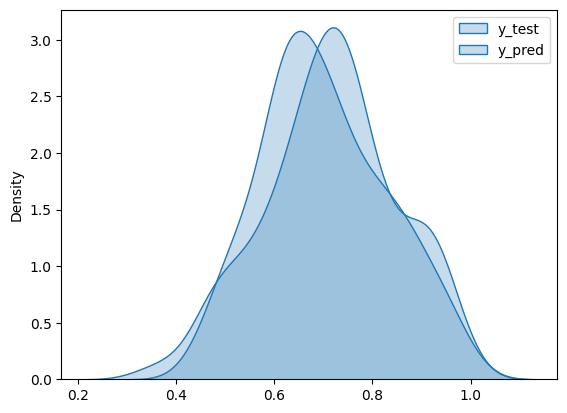

In [ ]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Use sns.kdeplot for visualizing the distributions with 'fill=True'
sns.kdeplot(y_test, label='y_test', fill=True)
sns.kdeplot(y_pred, label='y_pred', fill=True)
plt.legend()

# Compute the model score (R-squared) separately
model_score = model.score(x_test, y_test)
print("Model Score (R-squared):", model_score)

plt.show()

Random Forest Classifier

Mean Squared Error: 1.3323043595286657
R-squared: -0.8413389321097786


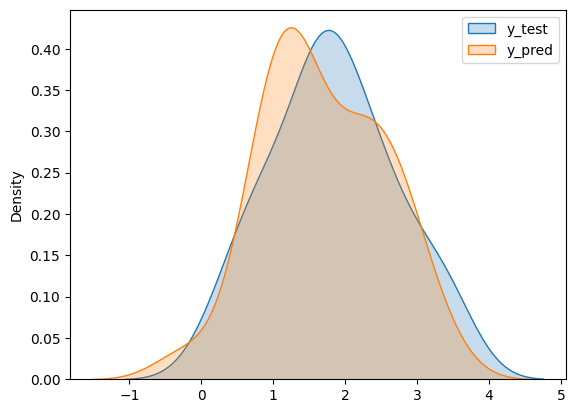

In [ ]:


# Assuming y_train and y_test are NumPy arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# Create a Random Forest Regressor
model = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Use sns.kdeplot for visualizing the distributions with 'fill=True'
sns.kdeplot(y_test, label='y_test', fill=True)
sns.kdeplot(y_pred, label='y_pred', fill=True)
plt.legend()

plt.show()


Support Vector Machine

Mean Squared Error (MSE): 0.8474441381966739
Accuracy: 0.9


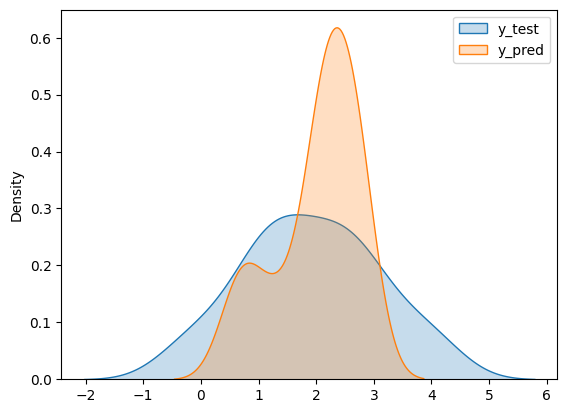

In [ ]:
# Create a sample dataset
x = np.random.rand(100, 1)
y = 2 * x + 1 + np.random.randn(100, 1)

# Convert y to a 1D array using ravel()
y = y.ravel()

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)

# Create an SVR regressor
model = SVR()

# Train the regressor on the training data
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate the mean squared error (MSE) as a regression metric
mse = ((y_pred - y_test) ** 2).mean()
print("Mean Squared Error (MSE):", mse)

# Visualize the distributions using sns.kdeplot
sns.kdeplot(y_test, label='y_test', fill=True)
sns.kdeplot(y_pred, label='y_pred', fill=True)
plt.legend()

# Define a threshold for classification (you can adjust this threshold)
threshold = 0.5

# Classify the predicted values
y_pred_class = (y_pred >= threshold).astype(int)

# Classify the true values
y_true_class = (y_test >= threshold).astype(int)

# Calculate the accuracy as a classification metric
accuracy = accuracy_score(y_true_class, y_pred_class)
print("Accuracy:", accuracy)

plt.show()
